# The Best Classifier

- I will practice all classification algorithms that i learned in this part.

- Loading dataset using Pandas library, applying the following algorithms, and finding the best model for this dataset

- So let's get started!

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Loading Dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-02-18 12:00:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2021-02-18 12:00:41 (18.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [45]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


This dataset is about past loans. The Loan_train.csv data set includes informations of 346 customers whose loan are already paid off or defaulted. It includes following fields:

- Loan_status = Whether a loan is paid off(갚다) or in collection
- Principal = Basic principal loan amount
- Terms = Origination terms which can be weekly, biweekly, and monthly payoff schedule
- Effective_date = When the loan got originated and took effects
- Due_date = Since it's one-time payoff schedule, each loan has one single due date
- Age = Age of applicant
- Education = Education of applicant
- Gender = The gender of applicant

In [4]:
df.loan_status.unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

### change the date to datetime

In [46]:
df['due_date'] = pd.to_datetime(df['due_date'])

In [47]:
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### We can see the null data from missingno library

In [22]:
!pip install missingno

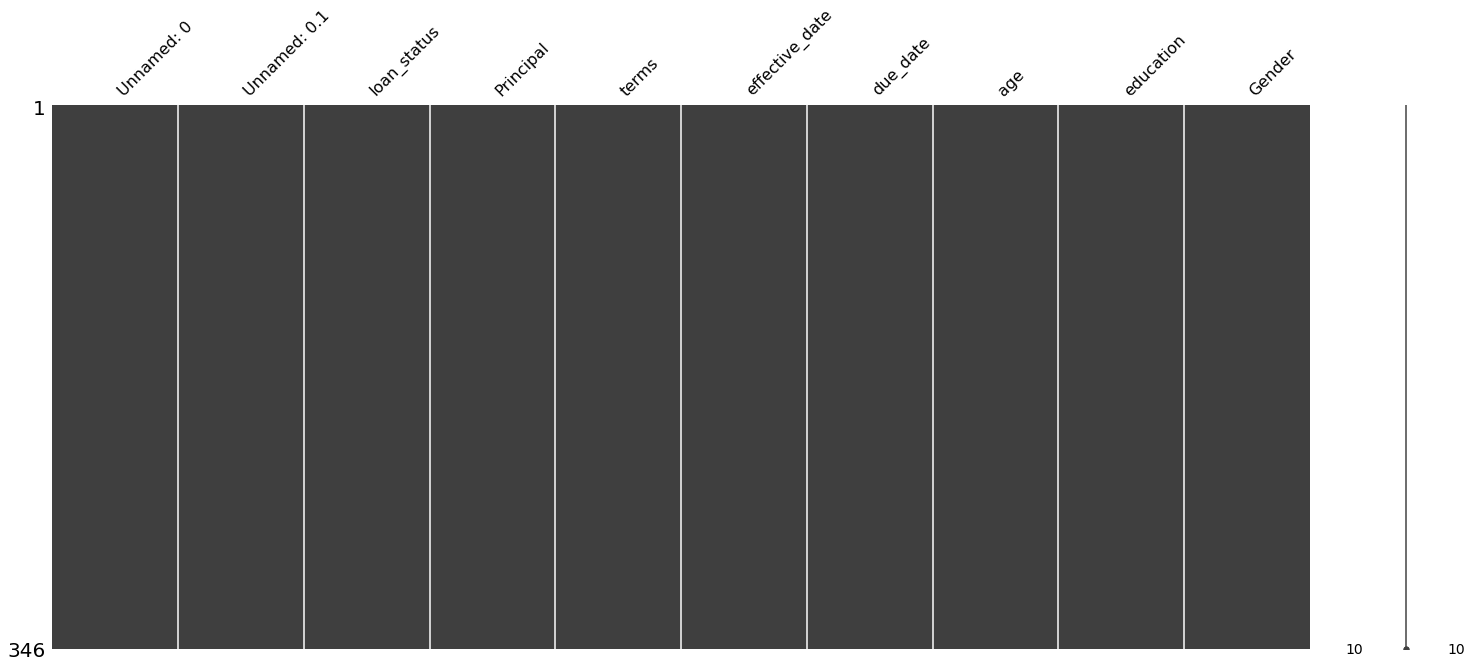

In [23]:
import missingno as msno
msno.matrix(df)

### There is no missing data in this dataset.

## Data Visualization and pre-processing

i will see how many in each columns

In [19]:
df.groupby('loan_status')['age'].mean()

loan_status
COLLECTION    30.651163
PAIDOFF       31.034615
Name: age, dtype: float64

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [10]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

-> principal loan amount
the larger the amount, the larger the loan

In [25]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

- 30 -> monthly
- 15 -> biweekly
- 7 -> weekly

### I will see the FacetGrid

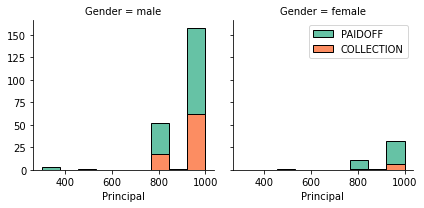

In [17]:
import seaborn as sns

bins = np.linspace(df['Principal'].min(), df['Principal'].max(),10)
f = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set2', col_wrap=2)
f.map(plt.hist, 'Principal', bins = bins, ec='k' )

f.axes[-1].legend()
plt.show()


-> When the amount of Principal is low, the total amount of loan is low.

Totally, the rate of PAIDOFF is larger than COLLECTION.

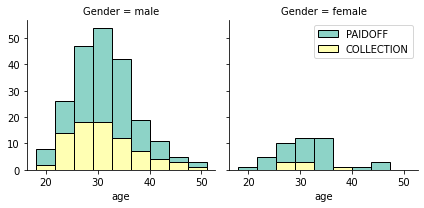

In [31]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
f = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
f.map(plt.hist, 'age', bins=bins, ec='k')

f.axes[-1].legend()
plt.show()

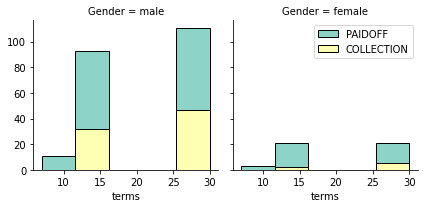

In [35]:
bins = np.linspace(df['terms'].min(), df['terms'].max(), 6)
f = sns.FacetGrid(df, col = 'Gender', hue='loan_status', palette='Set3', col_wrap=2)
f.map(plt.hist, 'terms', bins = bins, ec='k')

f.axes[-1].legend()
plt.show()

In [ ]:
# Pre-processing : Feature Engineering

### We use the date to compare whether Paidoff or Collection

In [36]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [37]:
df.education.unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

# One-hot-encoding of categorical data

In [38]:
def one_hot_encoding(x):
    one_dic = {}
    for i,v in enumerate(x):
        one_dic[v] = i
    return one_dic

# For my miss, I will make the copy of df, and We should check the dtypes of columns

In [48]:
df1 = df.copy()

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


-> We should change from object, datetime to int

In [65]:
def one_hot_encoding(x):
    one_dic={}
    for i,v in enumerate(x.unique()):
        one_dic[v] = i
    return one_dic

# Making edu_dic

In [67]:
edu_dic = one_hot_encoding(df1['education'])
edu_dic

{'High School or Below': 0, 'Bechalor': 1, 'college': 2, 'Master or Above': 3}

In [68]:
df1['education'] = df1['education'].apply(lambda x: edu_dic[x])
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,male


# Making LS_dic

In [69]:
LS_dic = one_hot_encoding(df1['loan_status'])
LS_dic

{'PAIDOFF': 0, 'COLLECTION': 1}

In [70]:
df1['loan_status'] = df1['loan_status'].apply(lambda x: LS_dic[x])

# Making dayofweek of datetime dtype

In [74]:
df1['eff_dayofweek'] = df1['effective_date'].apply(lambda x: x.dayofweek)
df1['due_dayofweek'] = df1['due_date'].apply(lambda x: x.dayofweek)

In [75]:
df1

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,male,3,4
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,female,3,4
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,male,3,3
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,female,4,5
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,male,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,1,800,15,2016-09-11,2016-09-25,32,0,male,6,6
342,395,395,1,1000,30,2016-09-11,2016-10-10,25,0,male,6,0
343,397,397,1,800,15,2016-09-12,2016-09-26,39,2,male,0,0
344,398,398,1,1000,30,2016-09-12,2016-11-10,28,2,male,0,3


# Making gen_dic

In [76]:
gen_dic = one_hot_encoding(df1['Gender'])

df1['Gender'] = df1['Gender'].apply(lambda x: gen_dic[x])

In [77]:
gen_dic

{'male': 0, 'female': 1}

In [78]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,4
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,4
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,3
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,5
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,5


# Then We are done! let's get the correlation between columns!

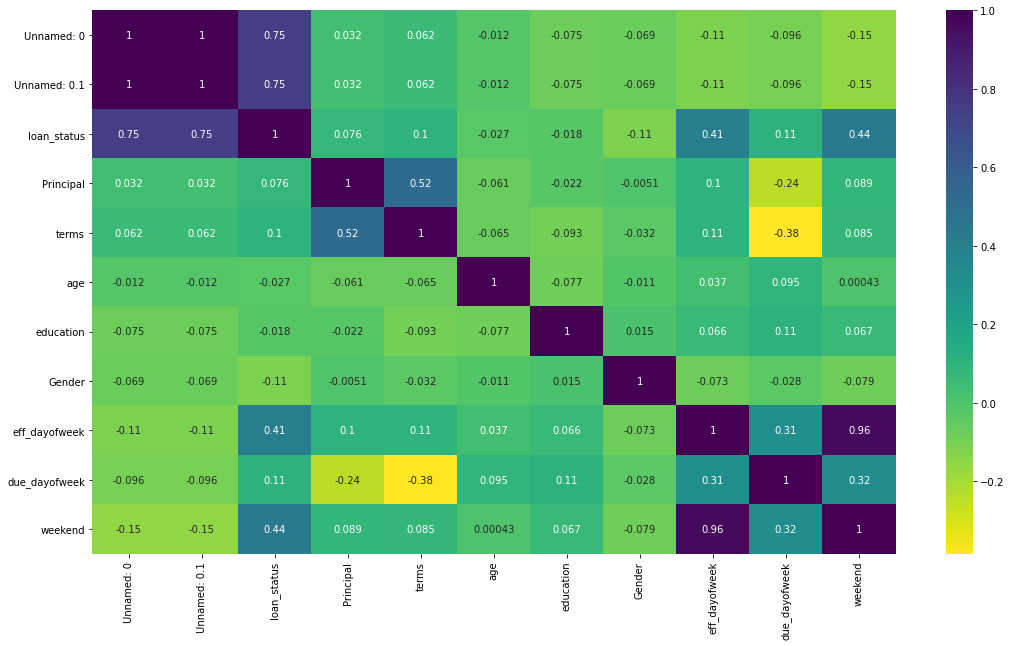

In [86]:
cor = df1.corr()

f, ax = plt.subplots(1,1, figsize=(18,10))
sns.heatmap(cor, annot=True, cmap='viridis_r', ax=ax)
plt.show()

In [81]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,4
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,4
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,3
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,5
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,5


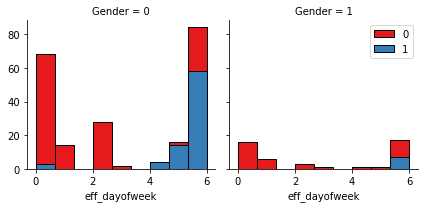

In [84]:
bins = np.linspace(df1['eff_dayofweek'].min(), df1['eff_dayofweek'].max(), 10)
f = sns.FacetGrid(df1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
f.map(plt.hist, 'eff_dayofweek', bins=bins, ec="k")
f.axes[-1].legend()
# dic = {'PAIDOFF': 0, 'COLLECTION': 1}
plt.show()

-> We can see the people who get the loan at the end of the week, don't pay it off, so we can use Feature binarization to set a threshold values less than day 4

In [85]:
df1['weekend'] = df1['eff_dayofweek'].apply(lambda x: 1 if x>3 else 0)
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,4,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,4,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,5,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,5,1


# Feature Selection
-> too many feature makes overfitting, and too small feature makes underfitting. But We can't know before trying.

## Load test set for column compare

In [88]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-02-18 15:03:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-02-18 15:03:36 (67.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [89]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# We should check the unique values of test data because we do one_hot_encoding to test data set equal to train dataset.

In [90]:
df_test['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

-> equal to train dataset.

In [92]:
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [93]:
df_test['eff_dayofweek'] = df_test['effective_date'].apply(lambda x: x.dayofweek)
df_test['due_dayofweek'] = df_test['due_date'].apply(lambda x: x.dayofweek)

In [94]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,4
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,3
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,6
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,6
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,6


In [95]:
df_test['loan_status'] = df_test['loan_status'].apply(lambda x: LS_dic[x])
df_test['education'] = df_test['education'].apply(lambda x: edu_dic[x])
df_test['Gender'] = df_test['Gender'].apply(lambda x: gen_dic[x])

In [101]:
df_test['weekend'] = df_test['eff_dayofweek'].apply(lambda x: 1 if x>3 else 0)

In [100]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,4,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,4,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,5,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,5,1


In [103]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,eff_dayofweek,due_dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,1,1,3,4,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,3,0,4,3,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,0,1,5,6,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,2,0,5,6,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,1,0,6,6,1


# Okay Let's Get Feature Selected

In [128]:
X = df1[['Principal', 'terms', 'age', 'Gender', 'weekend']]
X = pd.concat([X, pd.get_dummies(df1['education'])], axis=1)
y = df1['loan_status'].values
X

,Principal,terms,age,Gender,weekend,0,1,2,3
0,1000,30,45,0,0,1,0,0,0
1,1000,30,33,1,0,0,1,0,0
2,1000,15,27,0,0,0,0,1,0
3,1000,30,28,1,1,0,0,1,0
4,1000,30,29,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,1,0,0,0
342,1000,30,25,0,1,1,0,0,0
343,800,15,39,0,0,0,0,1,0
344,1000,30,28,0,0,0,0,1,0


# Normalize Data

In [129]:
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
        -0.86968108, -0.07624929],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.86968108, -0.07624929],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
         1.14984679, -0.07624929],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
         1.14984679, -0.07624929],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
         1.14984679, -0.07624929],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
         1.14984679, -0.07624929]])

In [127]:
test_input = df_test[['Principal', 'terms', 'age', 'Gender', 'weekend']]
test_input = pd.concat([test_input,pd.get_dummies(df_test['education'])], axis=1)
test_output = df_test['loan_status'].values
test_input.head()

,Principal,terms,age,Gender,weekend,0,1,2,3
0,1000,30,50,1,0,0,1,0,0
1,300,7,35,0,1,0,0,0,1
2,1000,30,43,1,1,1,0,0,0
3,1000,30,26,0,1,0,0,1,0
4,800,15,29,0,1,0,1,0,0


In [130]:
test_input = preprocessing.StandardScaler().fit_transform(test_input)
test_input

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
        -0.79772404,  2.39791576, -0.86135677, -0.19611614],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.79772404, -0.41702883, -0.86135677,  5.09901951],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
         1.25356634, -0.41702883, -0.86135677, -0.19611614],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.79772404, -0.41702883,  1.16095912, -0.19611614],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
        -0.79772404,  2.39791576, -0.86135677, -0.19611614],
       [-1.24479571, -0.78854628,  0.19650211, -0.50578054,  0.76696499,
         1.25356634, -0.41702883, -0.86135677, -0.19611614],
       [ 0.49362588, -0.78854628, -1.31937134, -0.50578054,  0.76696499,
        -0.79772404, -0.41702883,  1.16095912, -0.19611614],
       [ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0

In [113]:
test_output = test_output.values
type(test_output)

numpy.ndarray

# Classification

- Now we can make prediction model according to various models.
    
    - K Nearest Neighbor(KNN)
    - Decision Tree
    - Support Vector Machine
    - Logistic Regression
    
Notice : 

    - We should do pre-processing and EDA, Feature Engineering again and again until we get the satisfacted score.

# K Nearest Neighbor(KNN)

- Notice : Find the best k to build the model with the best accuracy

And for that, I will split the train, test data only in loan_train dataset.

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    
k_best = mean_acc.argmax()+1

In [133]:
k_best

14

In [150]:
knn= KNeighborsClassifier(n_neighbors = k_best).fit(X, y)

# Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
DT = DecisionTreeClassifier(criterion='entropy')

In [172]:
DT.fit(X,y)
DT_hat = DT.predict(test_input)


We will now evaluate the predicted classes using some metrics. For this case, we will use 'accuracy_score' to calculate the accuracy of the predicted labels.

In [139]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on test data: ', accuracy_score(y_test, y_hat))

Accuracy Score on test data:  0.7115384615384616


# Support Vector Machine

In [143]:
from sklearn import svm

In [144]:
svm = svm.SVC(C=0.01, kernel = 'rbf')

In [179]:
svm.fit(X, y)

SVC(C=0.01)

# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

In [148]:
lr = LogisticRegression(solver='liblinear')

In [177]:
lr.fit(X, y)

LogisticRegression(solver='liblinear')

# Model Evaluation with Test Dataset

In [163]:
conda upgrade scikit-learn

Solving environment: - 

Updating scikit-learn is constricted by 

ibm-wsrt-py37main-main -> requires scikit-learn==0.23.1[build=*]

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gmpy2-2.0.8                |   py37h10f8cd9_2         150 KB
    mpc-1.1.0                  |       h10f8cd9_1          90 KB
    mpfr-4.0.2                 |       hb69a4c5_1         487 KB
    sympy-1.6.2                |   py37h06a4308_1         8.6 MB
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following NEW packages 

In [164]:
from sklearn.metrics import jaccard_similarity_score

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [154]:

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

- Jaccard Similarity of all classifiers

In [151]:
# KNN
knn_hat = knn.predict(test_input)
knn_jaccard = jaccard_similarity_score(test_output, knn_hat)
knn_jaccard

NameError: name 'jaccard_similarity_score' is not defined

- F1-score of all classifiers

In [166]:
# KNN

knn_hat = knn.predict(test_input)
knn_f1 = f1_score(test_output, knn_hat, pos_label=0)
knn_f1

0.8260869565217392

In [173]:
# DT

DT_f1 = f1_score(test_output, DT_hat, pos_label=0)
DT_f1

0.8192771084337349

In [180]:
# svm

svm_hat = svm.predict(test_input)
svm_f1 = f1_score(test_output, svm_hat, pos_label=0)
svm_f1

0.851063829787234

In [178]:
# logistic regression

lr_hat = lr.predict(test_input)
lr_f1 = f1_score(test_output, lr_hat, pos_label=0)
lr_f1

0.8602150537634409

- Building model using Logistic Regression and find the accuracy evaluation

In [181]:
# logistic regression

lr_hat2 = lr.predict_proba(test_input)
lr_logloss = log_loss(test_output, lr_hat2)
lr_logloss

0.47761097169235894